In [3]:
conda env create -f environment.yml


CondaValueError: prefix already exists: /opt/conda/envs/diversity


Note: you may need to restart the kernel to use updated packages.


In [1]:
from sagemaker.tensorflow import TensorFlowModel

model = TensorFlowModel(model_data='s3://diversitybucket-v9/models/ssd_mobnet_v9.tar.gz', role='arn:aws:iam::178511518038:role/service-role/AmazonSageMaker-ExecutionRole-20220225T215061',framework_version="2.7.0")

In [2]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.c5.large')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


----!

In [3]:
endpoint = predictor.endpoint
endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'tensorflow-inference-2022-06-03-11-41-57-589'

In [4]:
# Access images stored in s3 bucket
import boto3

# When running on SageMaker, need execution role
from sagemaker import get_execution_role
role = get_execution_role()

# Connect to S3 bucket and download file
s3 = boto3.resource('s3')

# Declare bucket name, remote file, and destination
my_bucket = s3.Bucket('diversitybucket-v9')

list_images=[]

# Use the Amazon S3 resource object that is now configured with the 
# credentials to access your S3 buckets. 

for object_summary in my_bucket.objects.filter(Prefix="images"):
    list_images.append(object_summary.key)
    
list_images=list_images[1::]
print(list_images)

['images/shutterstock_116232448.jpg', 'images/shutterstock_1470647.jpg', 'images/shutterstock_1661728.jpg', 'images/shutterstock_1661728_rotated.jpg', 'images/shutterstock_2077581352.jpg', 'images/shutterstock_2106898196.jpg', 'images/shutterstock_2498032.jpg', 'images/shutterstock_60061129.jpg']


In [5]:
#Choose image from above list
image_key=list_images[2]

In [6]:
#Keep image name only
image_key=image_key[7:] 

In [7]:
image_key2=image_key[:-4]

In [8]:
import cv2

In [9]:
import my_inference

2022-06-03 11:45:50.524580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/envs/diversity/lib/python3.10/site-packages/cv2/../../lib64:
2022-06-03 11:45:50.525118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
path='s3://diversitybucket-v9/images/{}'.format(image_key)

In [11]:
!aws s3 cp $path /root/image.jpg

download: s3://diversitybucket-v9/images/shutterstock_1661728.jpg to ./image.jpg


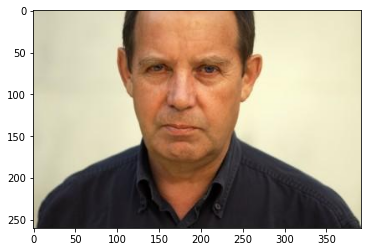

In [12]:
import matplotlib
from matplotlib import pyplot as plt
image_content=cv2.imread('image.jpg',1) # Checks dimensions of output of cv2.imread
%matplotlib inline
plt.imshow(cv2.cvtColor(image_content, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
image_key+"_withlabel.jpg"

'shutterstock_1661728.jpg_withlabel.jpg'

In [14]:
image_withlabel, score = my_inference.inference('image.jpg',image_content,predictor,image_key2)

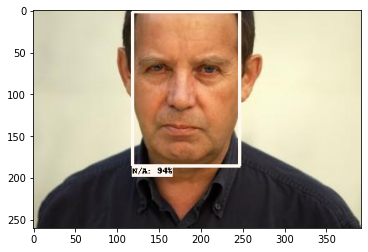

In [15]:
#%matplotlib inline
plt.imshow(image_withlabel)
plt.imshow(cv2.cvtColor(image_withlabel, cv2.COLOR_BGR2RGB))